In [29]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
from tqdm import tqdm

In [3]:
df = pd.read_csv("/nfs/masi/krishar1/InhaleExhaleCT_DICOMtoNIfTI/scan.csv")
df

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor
0,ANONTT273J11U,NaN,CT,Body,Philips,10.000000,39,39,390.00000,1.2.840.113704.1.111.2068.1278527481.7,L,1.000,120,393,NaN,330,150.0,NaN
1,ANONSB673J1DQ,NaN,CT,Body,Philips,3.000000,100,100,300.00000,1.2.840.113704.1.111.5680.1256909616.11,B,3.000,120,296,NaN,90,100.0,NaN
2,ANONAJO93J1QE,NaN,CT,Body,Philips,10.000015,29,29,290.00043,1.2.840.113704.1.111.6400.1401367901.37,L,1.250,120,393,330.0,455,150.0,NaN
3,ANONSB673J1DQ,NaN,CT,Body,Philips,0.625000,1,3,0.62500,1.2.840.113704.1.111.5680.1256909452.3,NaN,0.625,120,500,5000.0,30,NaN,NaN
4,ANONSB673J1DQ,NaN,CT,Body,Philips,10.000000,31,31,310.00000,1.2.840.113704.1.111.5680.1256909625.13,L,1.250,120,298,500.0,200,100.0,NaN
5,ANONSB673J1DQ,NaN,CT,Body,Philips,0.625000,1,3,0.62500,1.2.840.113704.1.111.5680.1256909922.16,NaN,0.625,120,500,4500.0,30,NaN,NaN
6,ANON88673J1O5,NaN,CT,Other,Philips,0.625000,1,3,0.62500,1.2.124.113532.160.129.47.14.20090702.131711.1...,NaN,0.625,120,500,5000.0,30,NaN,NaN
7,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249503948.7,L,1.250,120,350,500.0,400,200.0,NaN
8,ANONSB673J1DQ,NaN,CT,Body,Philips,10.000000,31,31,310.00000,1.2.840.113704.1.111.5680.1256909560.7,L,1.000,120,296,NaN,90,100.0,NaN
9,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249504002.10,L,1.250,120,350,500.0,400,200.0,NaN


In [6]:
#Remove rows where the value in the NumSlice column is 1 
df = df[df.NumSlice != 1]
df.to_csv("/nfs/masi/krishar1/InhaleExhaleCT_DICOMtoNIfTI/PRIVIA_usable_scans.csv", index = False)

In [16]:
#Read the newly formulated csv file 
privia = pd.read_csv("/nfs/masi/krishar1/InhaleExhaleCT_DICOMtoNIfTI/PRIVIA_usable_scans.csv")
privia

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor,ImageSize,Orientation
0,ANONTT273J11U,NaN,CT,Body,Philips,10.000000,39,39,390.00000,1.2.840.113704.1.111.2068.1278527481.7,L,1.00,120,393,NaN,330,150.0,NaN,"(768, 768, 39)","('L', 'A', 'S')"
1,ANONSB673J1DQ,NaN,CT,Body,Philips,3.000000,100,100,300.00000,1.2.840.113704.1.111.5680.1256909616.11,B,3.00,120,296,NaN,90,100.0,NaN,"(512, 512, 100)","('L', 'A', 'S')"
2,ANONAJO93J1QE,NaN,CT,Body,Philips,10.000015,29,29,290.00043,1.2.840.113704.1.111.6400.1401367901.37,L,1.25,120,393,330.0,455,150.0,NaN,"(768, 768, 29)","('L', 'P', 'I')"
3,ANONSB673J1DQ,NaN,CT,Body,Philips,10.000000,31,31,310.00000,1.2.840.113704.1.111.5680.1256909625.13,L,1.25,120,298,500.0,200,100.0,NaN,"(768, 768, 31)","('L', 'A', 'S')"
4,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249503948.7,L,1.25,120,350,500.0,400,200.0,NaN,"(768, 768, 13)","('L', 'A', 'S')"
5,ANONSB673J1DQ,NaN,CT,Body,Philips,10.000000,31,31,310.00000,1.2.840.113704.1.111.5680.1256909560.7,L,1.00,120,296,NaN,90,100.0,NaN,"(512, 512, 31)","('L', 'A', 'S')"
6,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249504002.10,L,1.25,120,350,500.0,400,200.0,NaN,"(768, 768, 13)","('L', 'A', 'S')"
7,ANONAJO93J1QE,NaN,CT,Body,Philips,0.500000,420,420,210.00000,1.2.840.113704.1.111.6400.1401367245.15,B,1.00,120,410,335.0,448,150.0,NaN,"(768, 768, 420)","('L', 'A', 'S')"
8,ANONTT273J11U,NaN,CT,Body,Philips,10.000000,29,29,290.00000,1.2.840.113704.1.111.2068.1278527953.22,L,1.25,120,372,500.0,300,150.0,NaN,"(768, 768, 29)","('L', 'P', 'I')"
9,ANON88673J1O5,NaN,CT,Other,Philips,3.000000,80,80,240.00000,1.2.124.113532.160.129.47.14.20090702.131717.1...,B,3.00,120,337,NaN,495,325.0,NaN,"(512, 512, 80)","('L', 'A', 'S')"


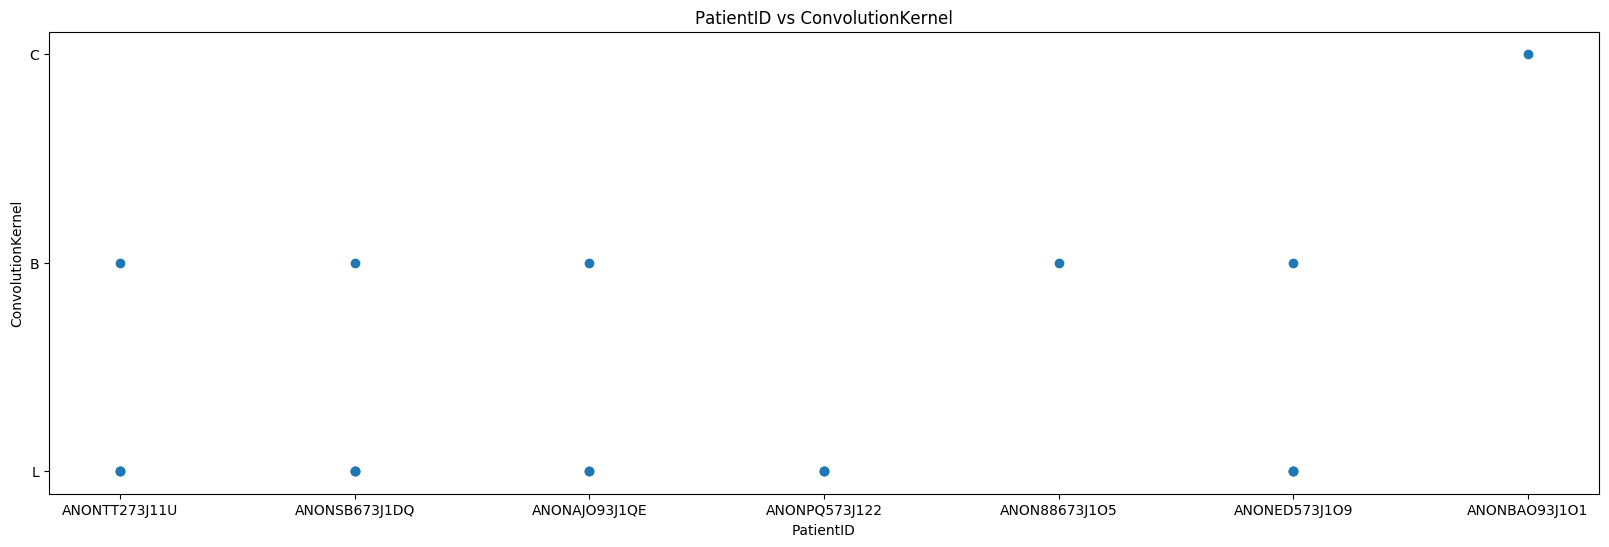

In [18]:
#Make a plot of PatientID vs ConvolutionKernel
plt.figure(figsize=(20, 6))
plt.scatter(privia.PatientID, privia.ConvolutionKernel)
plt.xlabel('PatientID')
plt.ylabel('ConvolutionKernel')
plt.title('PatientID vs ConvolutionKernel')
plt.show()

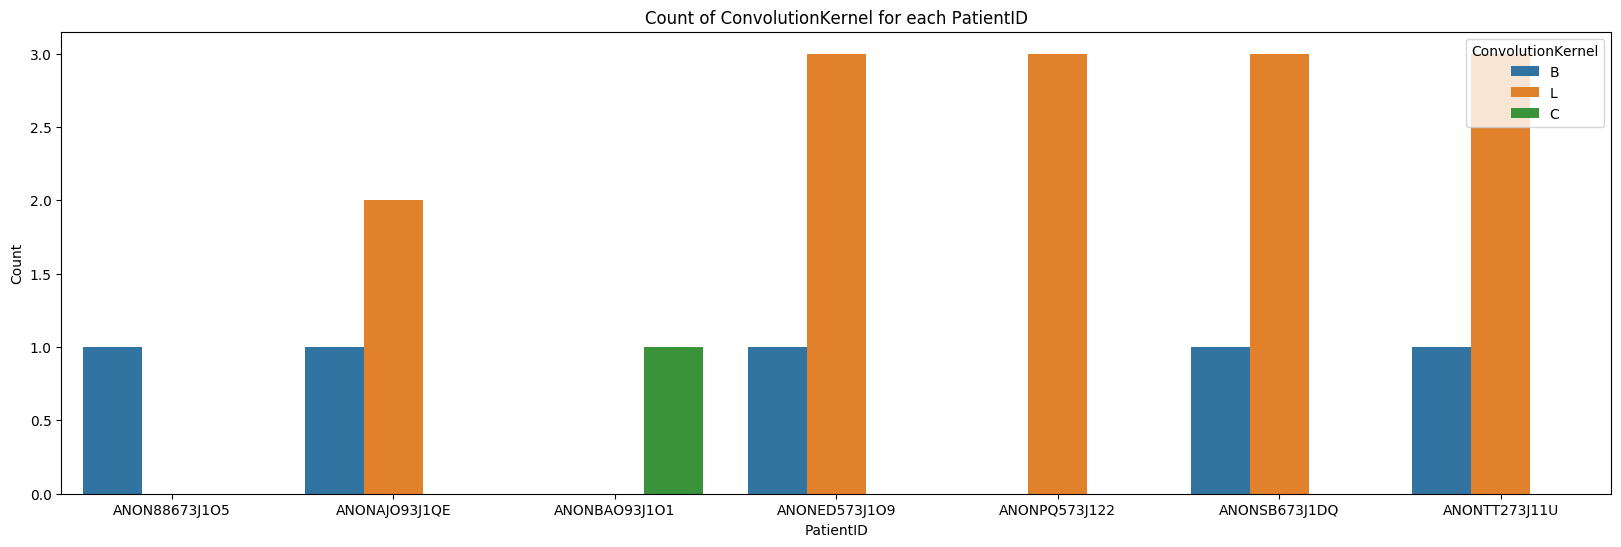

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is a countplot of the ConvolutionKernel for each PatientID
plt.figure(figsize=(20, 6))
sns.countplot(x='PatientID', hue='ConvolutionKernel', data=privia)
plt.xlabel('PatientID')
plt.ylabel('Count')
plt.title('Count of ConvolutionKernel for each PatientID')
plt.show()

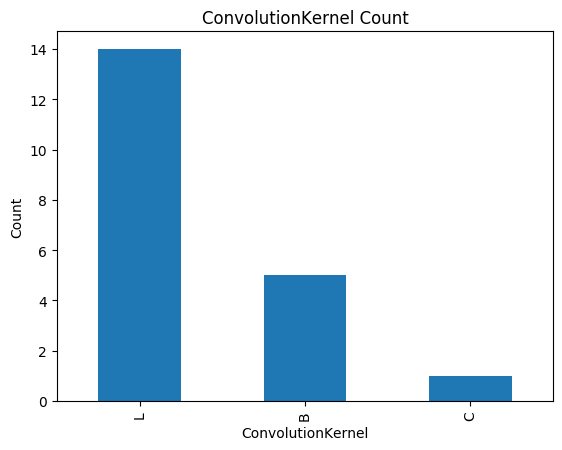

In [20]:
#Make a bar plot of the convolution kernels
privia.ConvolutionKernel.value_counts().plot(kind='bar')
plt.xlabel('ConvolutionKernel')
plt.ylabel('Count')
plt.title('ConvolutionKernel Count')
plt.show()

In [23]:
#Sort the PRIVIA dataframe by PatientID
privia = privia.sort_values(by = ['PatientID'])
privia

,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor,ImageSize,Orientation
9,ANON88673J1O5,NaN,CT,Other,Philips,3.000000,80,80,240.00000,1.2.124.113532.160.129.47.14.20090702.131717.1...,B,3.00,120,337,NaN,495,325.0,NaN,"(512, 512, 80)","('L', 'A', 'S')"
2,ANONAJO93J1QE,NaN,CT,Body,Philips,10.000015,29,29,290.00043,1.2.840.113704.1.111.6400.1401367901.37,L,1.25,120,393,330.0,455,150.0,NaN,"(768, 768, 29)","('L', 'P', 'I')"
10,ANONAJO93J1QE,NaN,CT,Body,Philips,0.399994,151,151,60.39908,1.2.840.113704.1.111.7668.1401368434.8,L,0.80,120,407,335.0,448,150.0,NaN,"(768, 768, 151)","('L', 'A', 'S')"
7,ANONAJO93J1QE,NaN,CT,Body,Philips,0.500000,420,420,210.00000,1.2.840.113704.1.111.6400.1401367245.15,B,1.00,120,410,335.0,448,150.0,NaN,"(768, 768, 420)","('L', 'A', 'S')"
16,ANONBAO93J1O1,NaN,CT,Body,Philips,3.000000,113,113,339.00000,1.2.840.113704.1.111.1308.1261155213.7,C,3.00,120,400,NaN,360,298.0,NaN,"(512, 512, 113)","('L', 'A', 'S')"
14,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,27,27,270.00000,1.2.840.113704.1.111.416.1289312961.8,L,1.25,120,416,330.0,303,100.0,NaN,"(768, 768, 27)","('L', 'A', 'S')"
11,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,34,34,340.00000,1.2.840.113704.1.111.3800.1289312635.23,L,1.25,120,420,330.0,303,100.0,NaN,"(768, 768, 34)","('L', 'A', 'S')"
18,ANONED573J1O9,NaN,CT,Body,Philips,3.000000,111,111,333.00000,1.2.840.113704.1.111.3800.1289312547.14,B,3.00,120,350,844.0,118,100.0,NaN,"(768, 768, 111)","('L', 'A', 'S')"
19,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,34,34,340.00000,1.2.840.113704.1.111.3800.1289312497.9,L,1.00,120,350,844.0,118,100.0,NaN,"(768, 768, 34)","('L', 'A', 'S')"
6,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249504002.10,L,1.25,120,350,500.0,400,200.0,NaN,"(768, 768, 13)","('L', 'A', 'S')"


In [30]:
# Assuming 'df' is your DataFrame
privia = privia[privia['Orientation'] != "('L', 'P', 'I')"]
privia


,PatientID,StudyDate,Modality,BodyPart,Manufacturer,Spacing,NumSlice,NumDICOM,ScanLength,SeriesUID,ConvolutionKernel,SliceThickness,KVP,Reconstruction Diameter,Exposure Time,X-Ray Tube Current,Exposure,Spiral Pitch Factor,ImageSize,Orientation
9,ANON88673J1O5,NaN,CT,Other,Philips,3.000000,80,80,240.00000,1.2.124.113532.160.129.47.14.20090702.131717.1...,B,3.00,120,337,NaN,495,325.0,NaN,"(512, 512, 80)","('L', 'A', 'S')"
10,ANONAJO93J1QE,NaN,CT,Body,Philips,0.399994,151,151,60.39908,1.2.840.113704.1.111.7668.1401368434.8,L,0.80,120,407,335.0,448,150.0,NaN,"(768, 768, 151)","('L', 'A', 'S')"
7,ANONAJO93J1QE,NaN,CT,Body,Philips,0.500000,420,420,210.00000,1.2.840.113704.1.111.6400.1401367245.15,B,1.00,120,410,335.0,448,150.0,NaN,"(768, 768, 420)","('L', 'A', 'S')"
16,ANONBAO93J1O1,NaN,CT,Body,Philips,3.000000,113,113,339.00000,1.2.840.113704.1.111.1308.1261155213.7,C,3.00,120,400,NaN,360,298.0,NaN,"(512, 512, 113)","('L', 'A', 'S')"
14,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,27,27,270.00000,1.2.840.113704.1.111.416.1289312961.8,L,1.25,120,416,330.0,303,100.0,NaN,"(768, 768, 27)","('L', 'A', 'S')"
11,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,34,34,340.00000,1.2.840.113704.1.111.3800.1289312635.23,L,1.25,120,420,330.0,303,100.0,NaN,"(768, 768, 34)","('L', 'A', 'S')"
18,ANONED573J1O9,NaN,CT,Body,Philips,3.000000,111,111,333.00000,1.2.840.113704.1.111.3800.1289312547.14,B,3.00,120,350,844.0,118,100.0,NaN,"(768, 768, 111)","('L', 'A', 'S')"
19,ANONED573J1O9,NaN,CT,Body,Philips,10.000000,34,34,340.00000,1.2.840.113704.1.111.3800.1289312497.9,L,1.00,120,350,844.0,118,100.0,NaN,"(768, 768, 34)","('L', 'A', 'S')"
6,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249504002.10,L,1.25,120,350,500.0,400,200.0,NaN,"(768, 768, 13)","('L', 'A', 'S')"
4,ANONPQ573J122,NaN,CT,Other,Philips,20.000000,13,13,260.00000,1.2.840.113704.1.111.8388.1249503948.7,L,1.25,120,350,500.0,400,200.0,NaN,"(768, 768, 13)","('L', 'A', 'S')"


In [31]:
privia.to_csv("/nfs/masi/krishar1/InhaleExhaleCT_DICOMtoNIfTI/PRIVIA_LAS_usable_scans.csv", index = False)

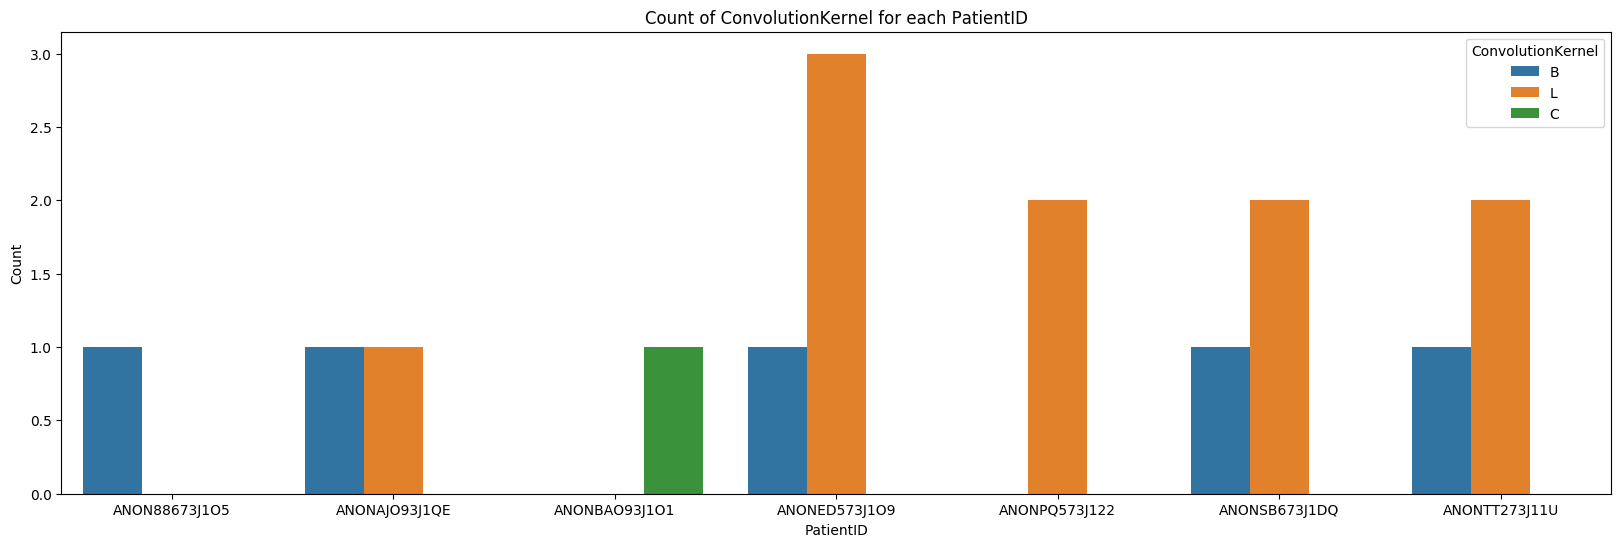

In [32]:
# This is a countplot of the ConvolutionKernel for each PatientID
plt.figure(figsize=(20, 6))
sns.countplot(x='PatientID', hue='ConvolutionKernel', data=privia)
plt.xlabel('PatientID')
plt.ylabel('Count')
plt.title('Count of ConvolutionKernel for each PatientID')
plt.show()

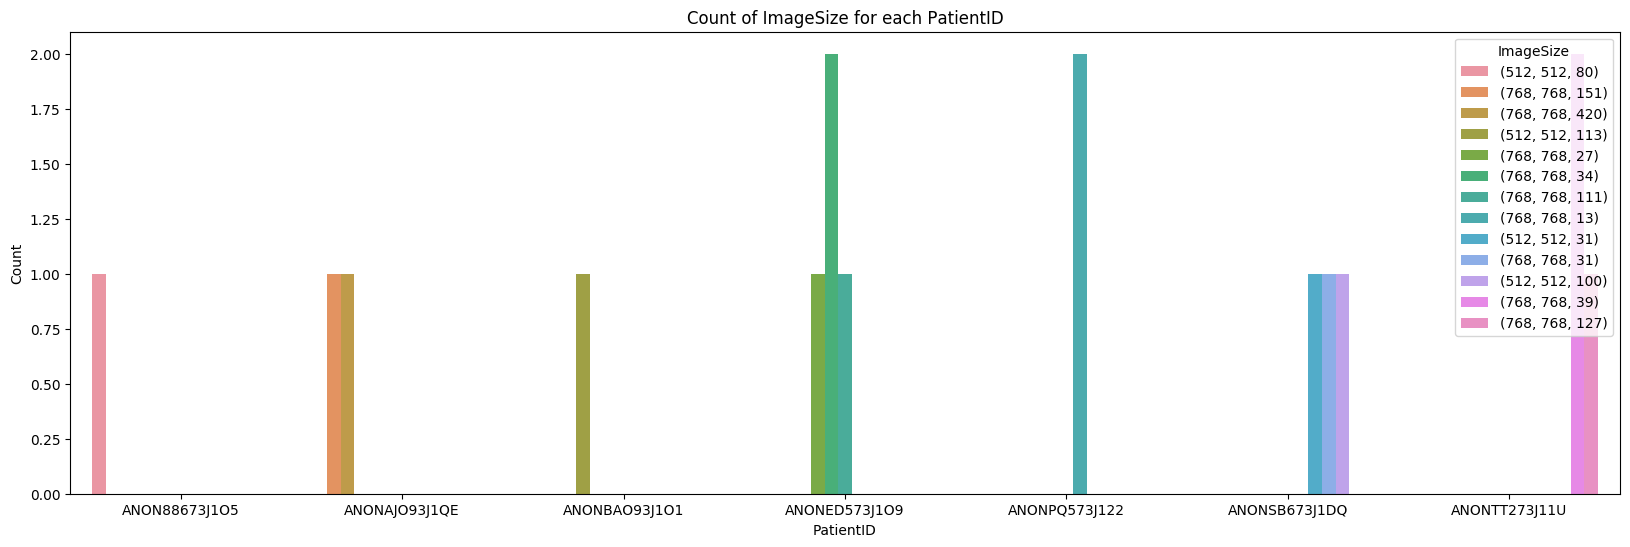

In [33]:
#Make a countplot of the PatientID vseruse image size 
plt.figure(figsize=(20, 6))
sns.countplot(x='PatientID', hue='ImageSize', data=privia)
plt.xlabel('PatientID')
plt.ylabel('Count')
plt.title('Count of ImageSize for each PatientID')
plt.show()

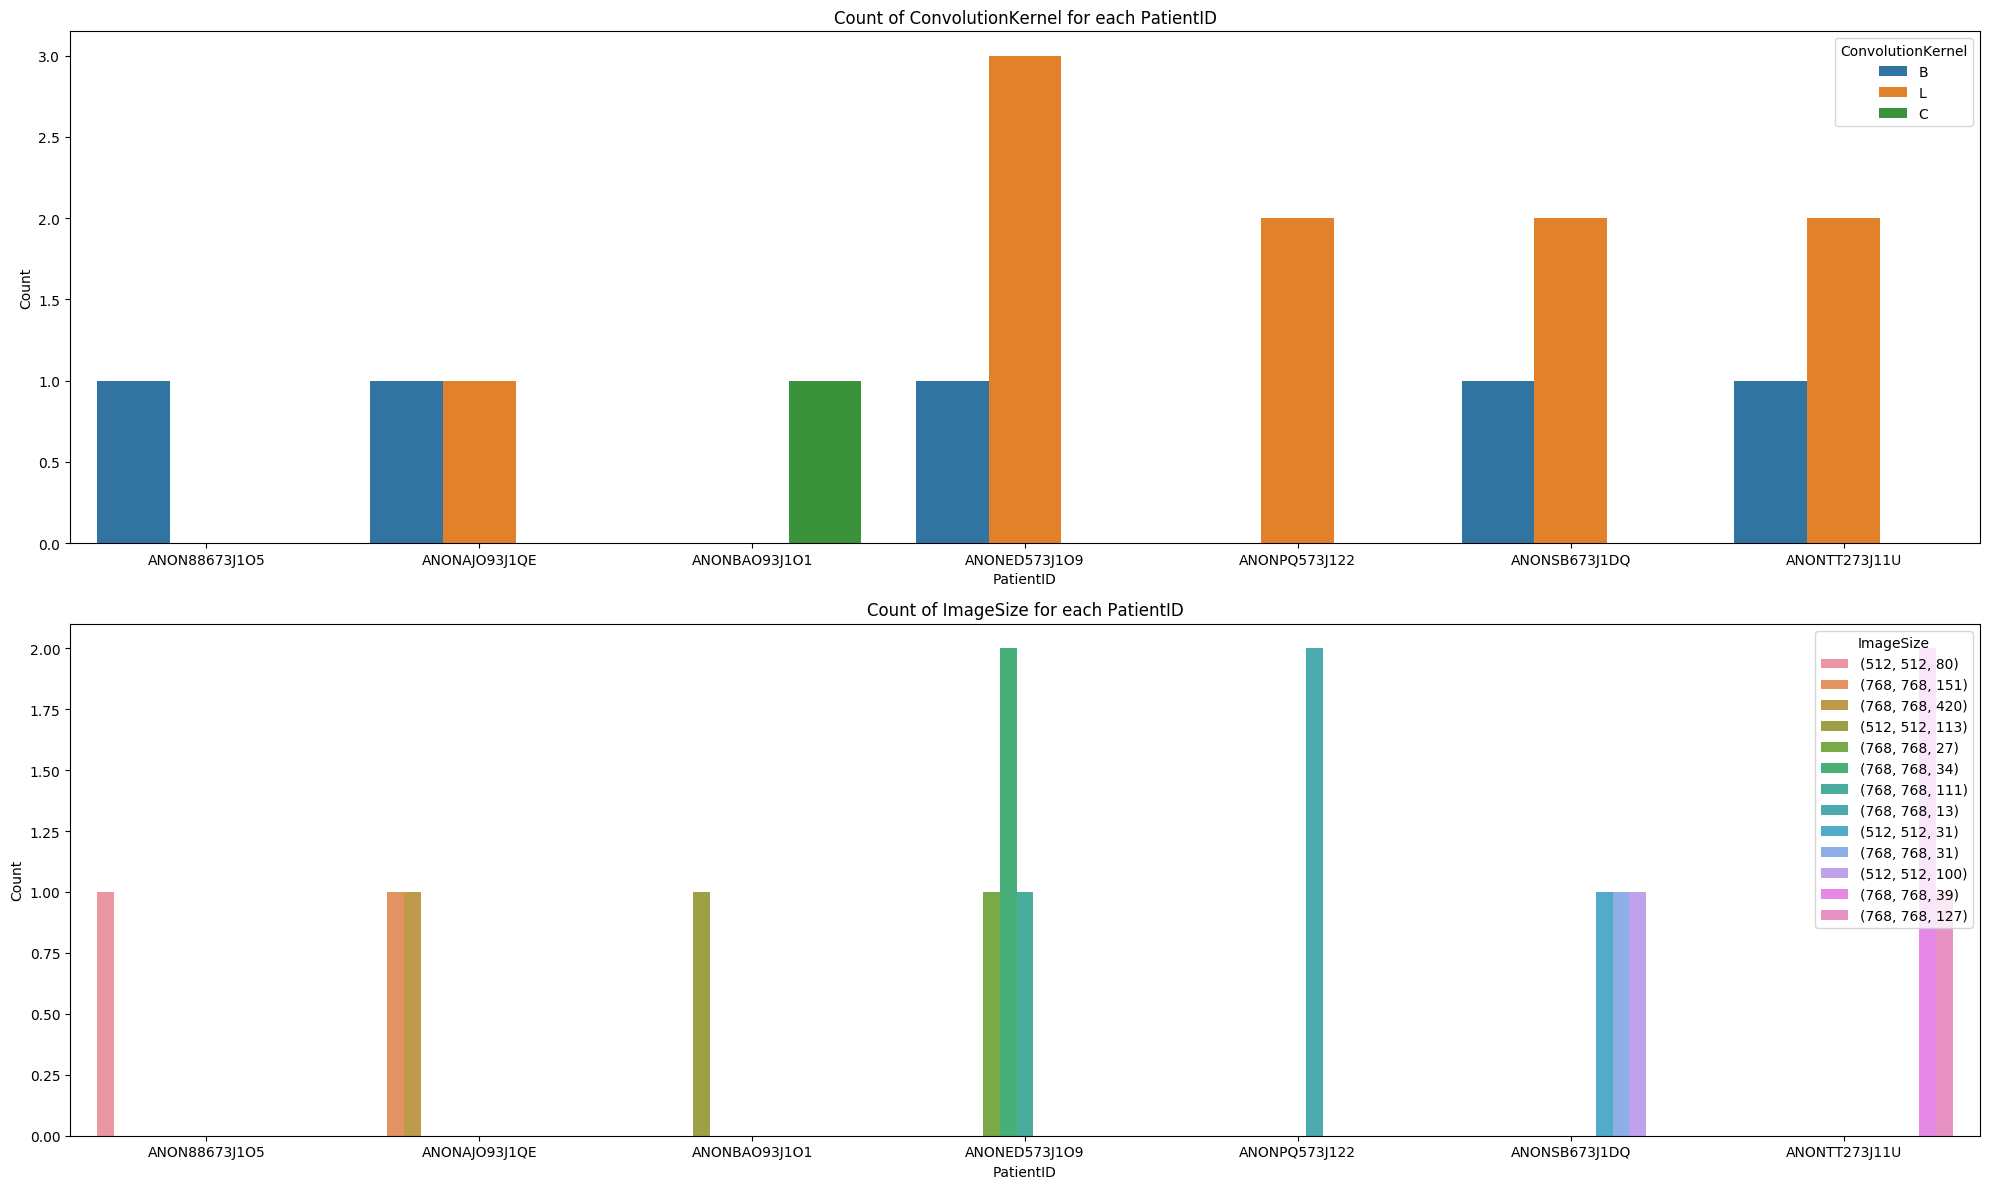

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(20, 12))

sns.countplot(x='PatientID', hue='ConvolutionKernel', data=privia, ax=axs[0])
axs[0].set_xlabel('PatientID')
axs[0].set_ylabel('Count')
axs[0].set_title('Count of ConvolutionKernel for each PatientID')

sns.countplot(x='PatientID', hue='ImageSize', data=privia, ax=axs[1])
axs[1].set_xlabel('PatientID')
axs[1].set_ylabel('Count')
axs[1].set_title('Count of ImageSize for each PatientID')

plt.tight_layout()
plt.show()